In [ ]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def blurImage(image):
    rows,cols,dims=image.shape
    image2 = np.double(image)
    ret_img = np.uint8(255*np.ones((rows,cols,dims)))
    for i in range(1, rows-1):
        for j in range(1,cols-1):
            for k in range(0,3):
                sum = image2[i,j,k]+image2[i-1,j,k]+image2[i,j-1,k]+image2[i+1,j,k]+image2[i,j+1,k]
                average = sum/5
                ret_img[i,j,k] = np.uint8(average)
    return ret_img
img=io.imread('horse.jpg')

plt.figure(num=0, figsize=(8,8))
    
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(img)

img2 = blurImage(img)

plt.subplot(1,2,2)
plt.title('canvas result')
plt.imshow(img2)
plt.show()


In [ ]:
from skimage import io
import matplotlib.pyplot as plt 
import numpy as np

def blendingImages(image1,image2,startX,startY):
    rows1,cols1,dims1=image1.shape
    rows2,cols2,dims2=image2.shape

image11 = np.double(image1)
image21 = np.double(image2)

ret_img = np.uint8(255*np.ones((500,500,3)))

for i in range(0, rows1):
    for j in range(0,cols1):
        for k in range(0,3):
            ret_img[i,j,k] = np.uint8(image11[i,j,k])

for i in range(startY+0, startY+rows2):
    for j in range(startX+0,startX+cols2):
        if (ret_img[i,j,0] == 255) and (ret_img[i,j,1] == 255) and (ret_img[i,j,2] == 255):
            for k in range(0,3):
                ret_img[i,j,k] = np.uint8(image21[i-startY,j-startX,k])
        else:
            for k in range(0,3):
                ret_img[i,j,k] = np.uint8((ret_img[i,j,k]+image21[i-startY,j-startX,k])/2)
    return ret_img

img=io.imread('horse.jpg')
img2=io.imread('road.jpg')

startX = 100
startY = 100
img3 = blendingImages(img,img2,startX,startY)

plt.figure(num=1, figsize=(15,15))
plt.subplot(1,3,1)
plt.title('horse')
plt.imshow(img)

plt.subplot(1,3,2)
plt.title('road')
plt.imshow(img2)

plt.subplot(1,3,3)
plt.title('blend')
plt.imshow(img3)
plt.show()


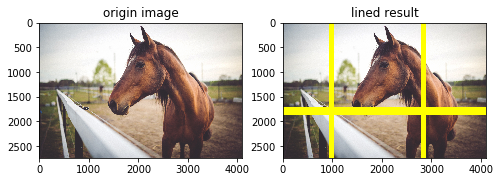

In [7]:
 from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def drawLine(image,color,linestep):
    rows,cols,dims=image.shape
    ret_img = np.uint8(image)

    # draw horizontal lines
    for i in range(linestep, rows, linestep):
        for j in range(0,cols):
            for k in range(0,3):
                ret_img[i,j,k] = np.uint8(color[k])#

    # draw vertical lines
    for i in range(0,rows):
        for j in range(linestep,cols,linestep):
            for k in range(0,3):
                ret_img[i,j,k] = np.uint8(color[k])

    return ret_img
img=io.imread('horse.jpg')
color = [255,255,0]
step = 20

plt.figure(num=2,figsize=(8,8))
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(img)

img2 = drawLine(img,color,step)

plt.subplot(1,2,2)
plt.title('lined result')
plt.imshow(img2) plt.show()


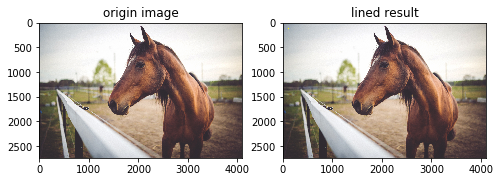

In [10]:
from skimage import io,draw
import matplotlib.pyplot as plt
import numpy as np

def drawLine2(image,color,startX,startY,endX,endY):
    rows,cols,dims=image.shape
    ret_img = np.uint8(image)

    rr, cc = draw.line(startX,startY,endX,endY)#
    ret_img[rr,cc]=color

    return ret_img
img=io.imread('horse.jpg')
color = [255,255,0]
startX = 20
startY = 50
endX = 200
endY = 150

plt.figure(num=3,figsize=(8,8))
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(img)

img2 = drawLine2(img,color,startX,startY,endX,endY)

plt.subplot(1,2,2)
plt.title('lined result')
plt.imshow(img2)
plt.show()


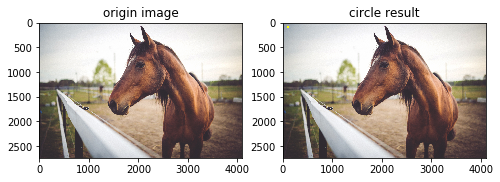

In [11]:
from skimage import io,draw
import matplotlib.pyplot as plt
import numpy as np

def drawCircle(image,color,center,raduis):
    rows,cols,dims=image.shape
    ret_img = np.uint8(image)

    rr, cc = draw.circle(center[0], center[1],radius)# 
    draw.set_color(ret_img,[rr,cc],color)#

    return ret_img
img=io.imread('horse.jpg')
plt.figure(num=4,figsize=(8,86))

color = [255,255,0]
center = [100,100]
radius = 30

plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(img)

img2 = drawCircle(img,color,center,radius)

plt.subplot(1,2,2)
plt.title('circle result')
plt.imshow(img2)
plt.show()


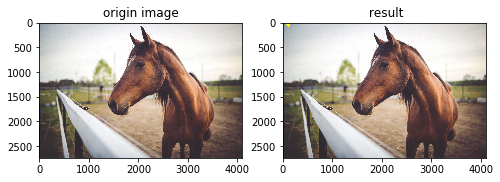

In [17]:
from skimage import io,draw
import matplotlib.pyplot as plt
import numpy as np

def drawPolygon(image,color,colX,lineY):
    rows,cols,dims=image.shape
    ret_img = np.uint8(image)

    rr, cc=draw.polygon(lineY,colX)#
    draw.set_color(ret_img,[rr,cc],color)#

    return ret_img

img=io.imread('horse.jpg')

color=[255,255,0]

lineY=[10,10,100,80]#順時針
colX=[40,160,120,80]#順時針

plt.figure(num=5,figsize=(8,8))
plt.subplot(1,2,1)
plt.title('origin image')
plt.imshow(img)

img2 = drawPolygon(img,color,colX,lineY)

plt.subplot(1,2,2)
plt.title(' result')
plt.imshow(img2)
plt.show()

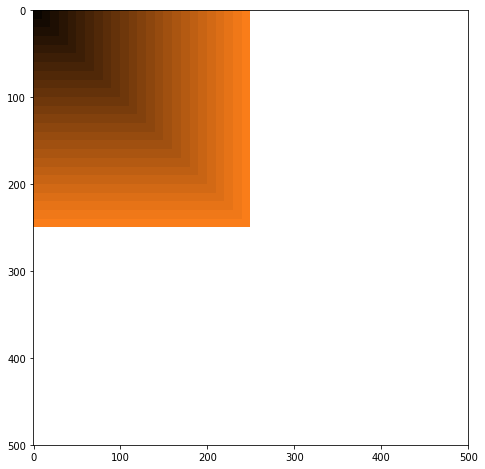

In [16]:
from skimage import io,draw
import matplotlib.pyplot as plt
import numpy as np

def drawPyramid(canvasSize):
    ret_img = np.uint8(255*np.ones((canvasSize[0],canvasSize[1],3)))

    for index in range(25,0,-1):
        color = [index*10, index*5, index]
        lineY=[0,0,index*10,index*10]
        colX=[0,index*10,index*10,0]
        rr, cc=draw.polygon(lineY,colX)
        draw.set_color(ret_img,[rr,cc],color)
    return ret_img

plt.figure(num=6,figsize=(8,8))

canvasSize=[500,500]

img = drawPyramid(canvasSize)

plt.imshow(img)
plt.show()
